## import libraries

In [7]:
!pip install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=a07dc7a85a9fb32351b534a9f2ed12d32399cb9ad408d6d6420bd21c7f49bbd7
  Stored in directory: c:\users\el.dawlia\appdata\local\pip\cache\wheels\c4\1a\79\20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [71]:
import pandas as pd  # to read data 
import numpy as np
import matplotlib.pyplot as plt  # for visualization 
import seaborn as sn
from apyori import apriori  # algorithm for association rule

## read data and display

In [101]:
df=pd.read_excel("Egyptian_Grocery_Transactions.xlsx")


In [84]:
print(df)

                                     0
0                          سكر,لبن,شاي
1                           فراخ,بطاطس
2                              رز,فراخ
3                    عسل,لحمة,رز,زبادي
4                           بصل,رز,عدس
5                شيبسي,فلفل,بيبسي,مياه
6                     فراخ,بطاطس,شيبسي
7                 طماطم,عدس,كورن فليكس
8                عسل,مربة,زيت,عيش بلدي
9        فراخ,مكرونة,شاي,كشري,سكر,سمنة
10                             عسل,عدس
11   زيت,بيض,فول,مكرونة,صلصة,جبنة قريش
12           شاي,عدس,عسل,زيت,بيبسي,بيض
13                         رز,عدس,كشري
14                       كشري,عيش بلدي
15                      لبن,بيبسي,مربة
16                 سكر,عيش بلدي,مكرونة
17                   بيبسي,زبادي,طعمية
18           بيبسي,سكر,زيت,عدس,فول,بيض
19  بيض,بيبسي,طعمية,سكر,سمنة,جبنة قريش


## preprocessing

In [87]:
df.head() # show first 5 raw

,0
0,"سكر,لبن,شاي"
1,"فراخ,بطاطس"
2,"رز,فراخ"
3,"عسل,لحمة,رز,زبادي"
4,"بصل,رز,عدس"


In [89]:
df.shape  # show (number or raws , number of columns)

(20, 1)

In [91]:
df.columns  # from result the first raw is header for the data 

Index([0], dtype='int64')

In [103]:
# solution 
df=pd.read_excel("Egyptian_Grocery_Transactions.xlsx",header=None)

In [105]:
df.head(8)  # show first 8 raw

,0
0,"سكر,لبن,شاي"
1,"فراخ,بطاطس"
2,"رز,فراخ"
3,"عسل,لحمة,رز,زبادي"
4,"بصل,رز,عدس"
5,"شيبسي,فلفل,بيبسي,مياه"
6,"فراخ,بطاطس,شيبسي"
7,"طماطم,عدس,كورن فليكس"


In [97]:
# assign name for column

df.columns=["items"]

In [99]:
df.head()  # show first 5 raw

,items
0,"سكر,لبن,شاي"
1,"فراخ,بطاطس"
2,"رز,فراخ"
3,"عسل,لحمة,رز,زبادي"
4,"بصل,رز,عدس"


In [111]:
df.isnull().sum() .sum() # to show number of null values in data

0

In [109]:
df.dropna()  # to drop null values

,0
0,"سكر,لبن,شاي"
1,"فراخ,بطاطس"
2,"رز,فراخ"
3,"عسل,لحمة,رز,زبادي"
4,"بصل,رز,عدس"
5,"شيبسي,فلفل,بيبسي,مياه"
6,"فراخ,بطاطس,شيبسي"
7,"طماطم,عدس,كورن فليكس"
8,"عسل,مربة,زيت,عيش بلدي"
9,"فراخ,مكرونة,شاي,كشري,سكر,سمنة"


In [28]:
df.duplicated().sum()  # to show number of dupliocated in data

0

In [30]:
df.describe()  # to show statistical describe 

,items
count,20
unique,20
top,"سكر,لبن,شاي"
freq,1


## Algorithm

In [33]:
len(df)

20

In [35]:
data=df["items"].tolist()

In [108]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 2.8 MB/s eta 0:00:01
   -------------------------------------- - 1.3/1.4 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.5 MB/s eta 0:00:00


In [37]:
from mlxtend.preprocessing import TransactionEncoder # to convert text to numbers
from mlxtend.frequent_patterns import apriori, association_rules  # algorithm

In [39]:
df["items"].values

array(['سكر,لبن,شاي', 'فراخ,بطاطس', 'رز,فراخ', 'عسل,لحمة,رز,زبادي',
       'بصل,رز,عدس', 'شيبسي,فلفل,بيبسي,مياه', 'فراخ,بطاطس,شيبسي',
       'طماطم,عدس,كورن فليكس', 'عسل,مربة,زيت,عيش بلدي',
       'فراخ,مكرونة,شاي,كشري,سكر,سمنة', 'عسل,عدس',
       'زيت,بيض,فول,مكرونة,صلصة,جبنة قريش', 'شاي,عدس,عسل,زيت,بيبسي,بيض',
       'رز,عدس,كشري', 'كشري,عيش بلدي', 'لبن,بيبسي,مربة',
       'سكر,عيش بلدي,مكرونة', 'بيبسي,زبادي,طعمية',
       'بيبسي,سكر,زيت,عدس,فول,بيض', 'بيض,بيبسي,طعمية,سكر,سمنة,جبنة قريش'],
      dtype=object)

In [41]:
transactions=[]
items=df['items'].values
print(items)


['سكر,لبن,شاي' 'فراخ,بطاطس' 'رز,فراخ' 'عسل,لحمة,رز,زبادي' 'بصل,رز,عدس'
 'شيبسي,فلفل,بيبسي,مياه' 'فراخ,بطاطس,شيبسي' 'طماطم,عدس,كورن فليكس'
 'عسل,مربة,زيت,عيش بلدي' 'فراخ,مكرونة,شاي,كشري,سكر,سمنة' 'عسل,عدس'
 'زيت,بيض,فول,مكرونة,صلصة,جبنة قريش' 'شاي,عدس,عسل,زيت,بيبسي,بيض'
 'رز,عدس,كشري' 'كشري,عيش بلدي' 'لبن,بيبسي,مربة' 'سكر,عيش بلدي,مكرونة'
 'بيبسي,زبادي,طعمية' 'بيبسي,سكر,زيت,عدس,فول,بيض'
 'بيض,بيبسي,طعمية,سكر,سمنة,جبنة قريش']


In [43]:
for i in range (0,len(items)):
    transactions.append(items[i].split(","))
    
print(transactions)
encoder=TransactionEncoder()
tran=encoder.fit(transactions).transform(transactions)
print(tran)

[['سكر', 'لبن', 'شاي'], ['فراخ', 'بطاطس'], ['رز', 'فراخ'], ['عسل', 'لحمة', 'رز', 'زبادي'], ['بصل', 'رز', 'عدس'], ['شيبسي', 'فلفل', 'بيبسي', 'مياه'], ['فراخ', 'بطاطس', 'شيبسي'], ['طماطم', 'عدس', 'كورن فليكس'], ['عسل', 'مربة', 'زيت', 'عيش بلدي'], ['فراخ', 'مكرونة', 'شاي', 'كشري', 'سكر', 'سمنة'], ['عسل', 'عدس'], ['زيت', 'بيض', 'فول', 'مكرونة', 'صلصة', 'جبنة قريش'], ['شاي', 'عدس', 'عسل', 'زيت', 'بيبسي', 'بيض'], ['رز', 'عدس', 'كشري'], ['كشري', 'عيش بلدي'], ['لبن', 'بيبسي', 'مربة'], ['سكر', 'عيش بلدي', 'مكرونة'], ['بيبسي', 'زبادي', 'طعمية'], ['بيبسي', 'سكر', 'زيت', 'عدس', 'فول', 'بيض'], ['بيض', 'بيبسي', 'طعمية', 'سكر', 'سمنة', 'جبنة قريش']]
[[False False False False False False False False  True False  True False
  False False False False False False False False False False False  True
  False False False False]
 [False  True False False False False False False False False False False
  False False False False False False  True False False False False False
  False False False False]
 [False

In [45]:
encodedData=pd.DataFrame(data = tran, columns = encoder.columns_, dtype = int)
encodedData.head()

,بصل,بطاطس,بيبسي,بيض,جبنة قريش,رز,زبادي,زيت,سكر,سمنة,...,فراخ,فلفل,فول,كشري,كورن فليكس,لبن,لحمة,مربة,مكرونة,مياه
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
%matplotlib inline

In [50]:
support=apriori(encodedData,min_support=0.1,use_colnames=True)
support.sort_values(by = 'support', ascending = False)

C:\Users\EL.DAWLIA\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
12,0.30,(عدس)
1,0.30,(بيبسي)
7,0.25,(سكر)
15,0.20,(فراخ)
2,0.20,(بيض)
4,0.20,(رز)
6,0.20,(زيت)
13,0.20,(عسل)
17,0.15,(كشري)
22,0.15,"(بيبسي, بيض)"


In [52]:
confidence = association_rules(support, metric = 'confidence', min_threshold = 0.3)
confidence.sort_values(by = 'confidence', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
44,"(سكر, بيض)",(بيبسي),0.1,0.30,0.1,1.000000,3.333333,1.0,0.070,inf,0.777778,0.333333,1.000000,0.666667
31,(سمنة),(سكر),0.1,0.25,0.1,1.000000,4.000000,1.0,0.075,inf,0.833333,0.400000,1.000000,0.700000
73,(فول),"(بيض, زيت)",0.1,0.15,0.1,1.000000,6.666667,1.0,0.085,inf,0.944444,0.666667,1.000000,0.833333
21,(فول),(بيض),0.1,0.20,0.1,1.000000,5.000000,1.0,0.080,inf,0.888889,0.500000,1.000000,0.750000
70,"(زيت, فول)",(بيض),0.1,0.20,0.1,1.000000,5.000000,1.0,0.080,inf,0.888889,0.500000,1.000000,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,(عدس),(عسل),0.3,0.20,0.1,0.333333,1.666667,1.0,0.040,1.200,0.571429,0.250000,0.166667,0.416667
41,(بيبسي),"(بيض, زيت)",0.3,0.15,0.1,0.333333,2.222222,1.0,0.055,1.275,0.785714,0.285714,0.215686,0.500000
55,(عدس),"(بيبسي, بيض)",0.3,0.15,0.1,0.333333,2.222222,1.0,0.055,1.275,0.785714,0.285714,0.215686,0.500000
53,(بيبسي),"(بيض, عدس)",0.3,0.10,0.1,0.333333,3.333333,1.0,0.070,1.350,1.000000,0.333333,0.259259,0.666667


In [54]:
rules = association_rules(support, metric="lift", min_threshold=1)

In [56]:
top_rules = rules.sort_values('lift', ascending=False).head(10)


top_rules['rule'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x))) + ' → ' + top_rules['consequents'].apply(lambda x: ', '.join(list(x)))


In [58]:
import seaborn as sns

C:\Users\EL.DAWLIA\AppData\Local\Temp\ipykernel_24528\2913238835.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lift', y='rule', data=top_rules, palette='viridis')


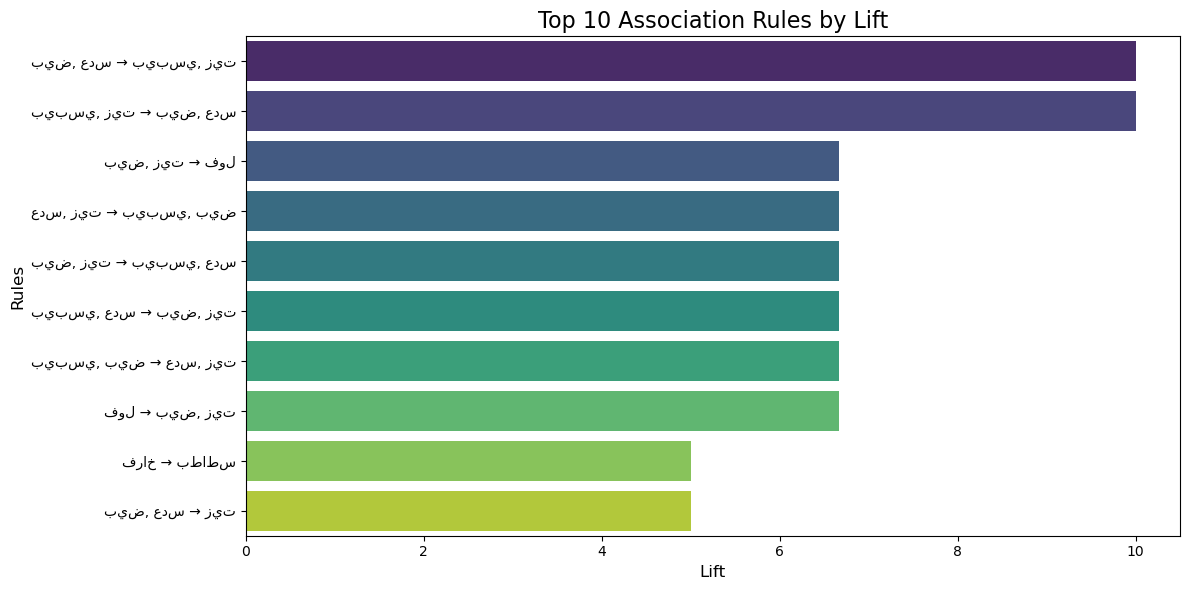

In [60]:
plt.figure(figsize=(12,6))
sns.barplot(x='lift', y='rule', data=top_rules, palette='viridis')

plt.xlabel('Lift', fontsize=12)
plt.ylabel('Rules', fontsize=12)
plt.title('Top 10 Association Rules by Lift', fontsize=16)
plt.tight_layout()
plt.show()